# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        print("n_samples=")
        print(n_samples)
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])

        data_list = [iter for iter in data_file]

        data = np.asarray(data_list, dtype=np.float64)                  

    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)
plt.show()

<Figure size 800x800 with 1 Axes>

The following is the program for plotting the dataset n.2

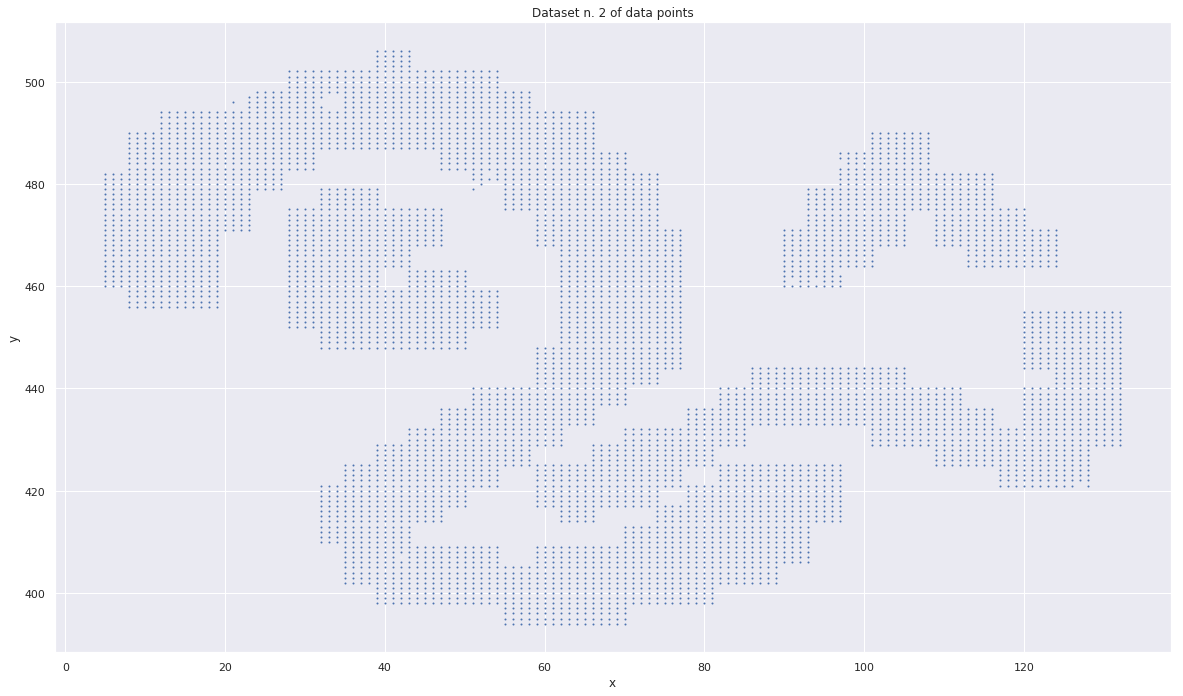

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

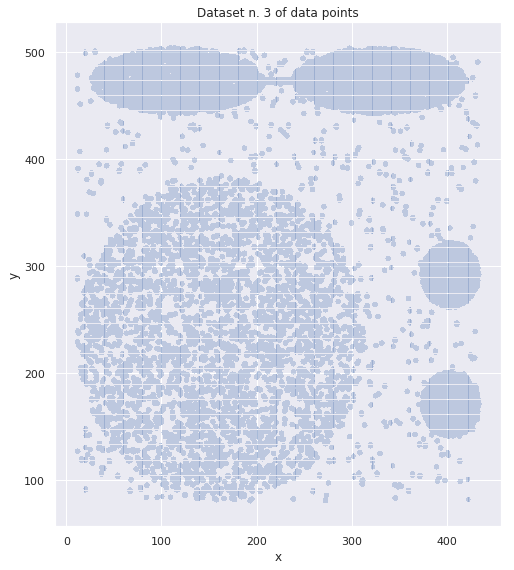

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'none')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

In the following program we plot the clusters

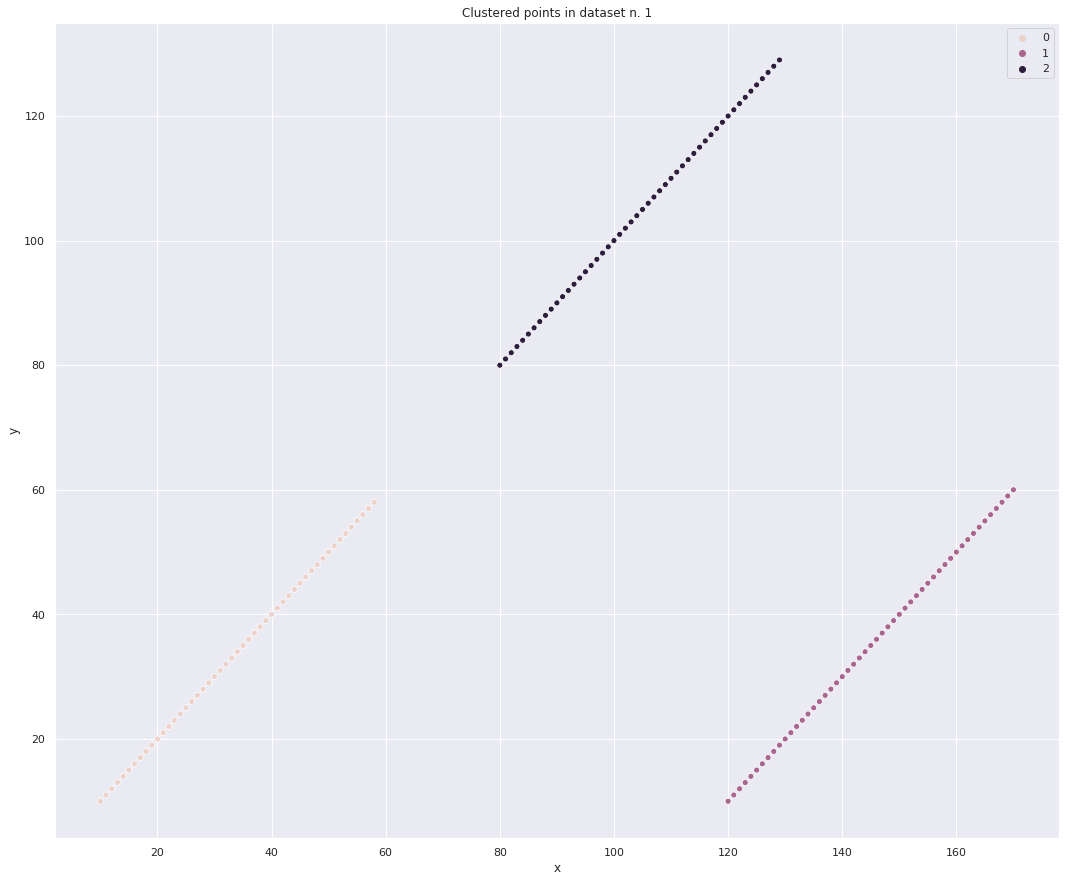

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 15))
plt.title('Clustered points in dataset n. 1')
plt.xlabel('x')
plt.ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
sns.scatterplot(data1[:, 0], data1[:, 1], kmeans1.labels_)

plt.show()

In the following cell we perform clustering & plotting with K-means on dataset2

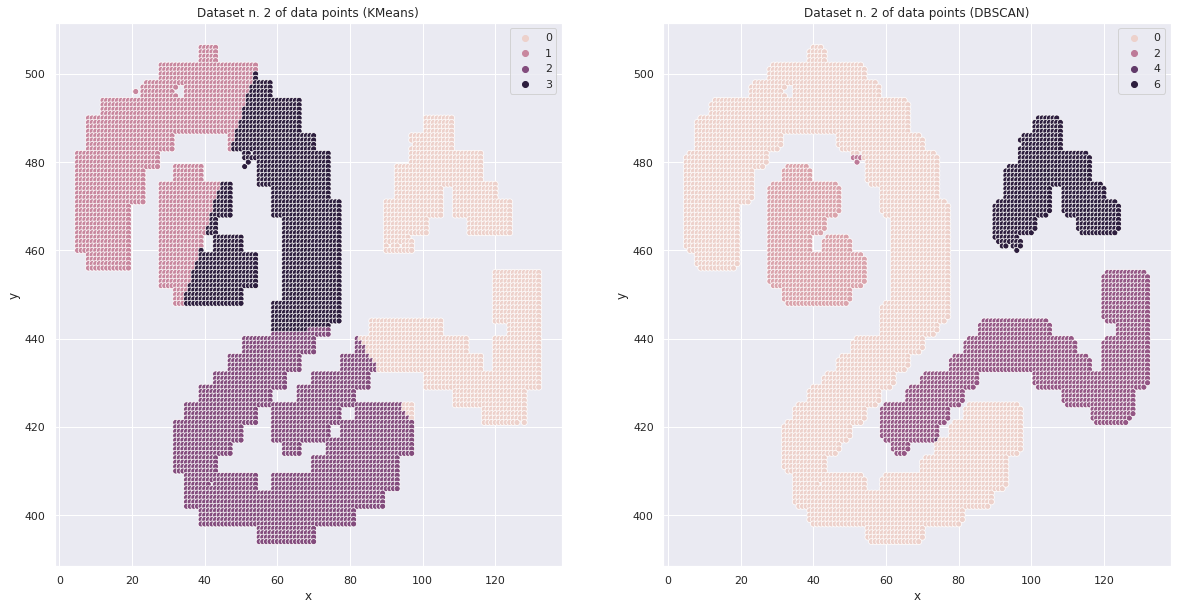

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
k=4
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
dbscan = DBSCAN(min_samples=5, eps=0.04).fit( StandardScaler().fit_transform(data2))

fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Dataset n. 2 of data points (KMeans)')
plt.xlabel(feature_names2[0])
plt.ylabel(feature_names2[1])
sns.scatterplot(data2[:, 0], data2[:, 1], kmeans2.labels_)

plt.subplot(1, 2, 2)
plt.title('Dataset n. 2 of data points (DBSCAN)')
plt.xlabel(feature_names2[0])
plt.ylabel(feature_names2[1])
sns.scatterplot(data2[dbscan.labels_ != -1, 0], data2[dbscan.labels_ != -1, 1], dbscan.labels_[dbscan.labels_ != -1] )
plt.show()

We perform clustering & plotting with K-means on the remaining dataset3

In [16]:
print(f'Dataset 3 has {n_samples3} samples')

k=5
data3_subset = np.random.permutation(data3)[:6000] #random subset of data3
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3_subset)
dbscan3 = DBSCAN(min_samples=28, eps=.12).fit(StandardScaler().fit_transform(data3_subset))
print(np.unique(dbscan3.labels_))

labels = kmeans3.predict(data3)
labels_sub = kmeans3.predict(data3_subset)

Dataset 3 has 86558 samples
[-1  0  1  2  3  4]


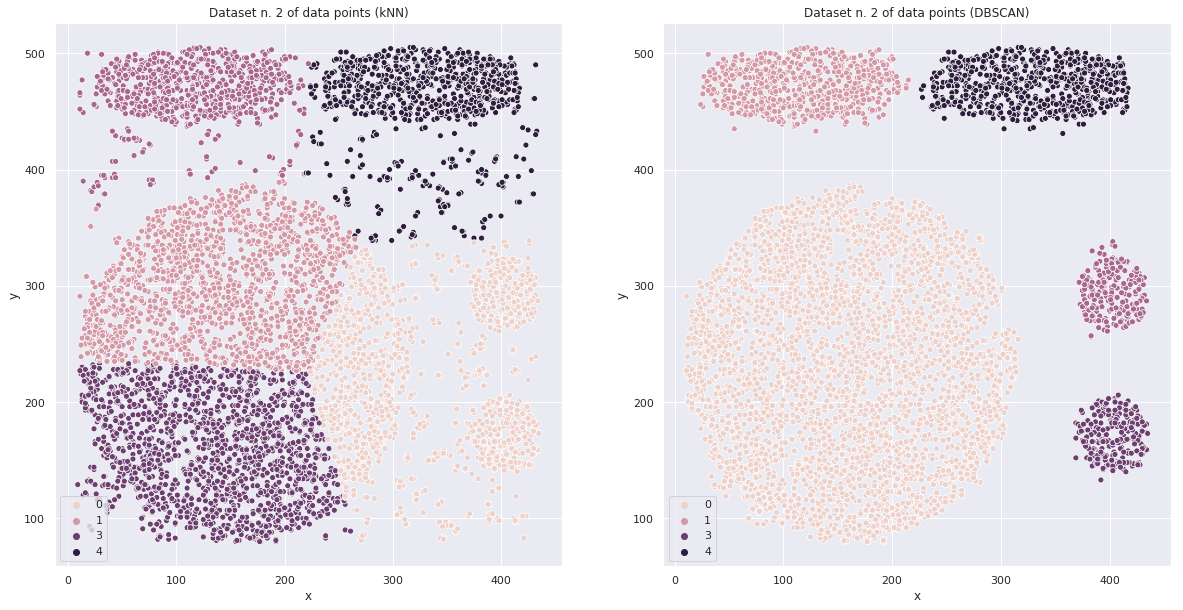

In [17]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Dataset n. 2 of data points (kNN)')
plt.xlabel(feature_names3[0])
plt.ylabel(feature_names3[1])
sns.scatterplot(data3_subset[:, 0], data3_subset[:, 1], labels_sub)

plt.subplot(1, 2, 2)
plt.title('Dataset n. 2 of data points (DBSCAN)')
plt.xlabel(feature_names3[0])
plt.ylabel(feature_names3[1])
sns.scatterplot(data3_subset[dbscan3.labels_ != -1, 0], data3_subset[dbscan3.labels_ != -1, 1], dbscan3.labels_[dbscan3.labels_ != -1])
plt.legend()

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [10]:
from sklearn import metrics

def gen_silhouette(X, k):
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, labels)
    silhouette_samples = metrics.silhouette_samples(X, labels)
    
    return silhouette_avg, silhouette_samples, labels

def gen_k_silhouette(X, max_k):
    silhouette_avg = list()
    silhouette_samples = list()
    labels = list()
    
    for k in range(2, max_k+1):
        avg, samples, l = gen_silhouette(X, k)
        silhouette_avg.append(avg)
        silhouette_samples.append(samples)
        labels.append(l)
    
    return silhouette_avg, silhouette_samples, labels

In [11]:
avg = {i: list() for i in range(3)}
samples = {i: list() for i in range(3)}
labels = {i: list() for i in range(3)}

for i, (data, features) in enumerate(zip(
    [data1, data2, data3_subset], [feature_names1, feature_names2, feature_names3])):
    
    print(f'Generating silhouettes for dataset {i} ({len(data)} samples)')
    avg[i], samples[i], labels[i] = gen_k_silhouette(data, 10)
    samples[i] = np.array(samples[i])
    labels[i] = np.array(labels[i])

Generating silhouettes for dataset 0 (150 samples)
Generating silhouettes for dataset 1 (6118 samples)
Generating silhouettes for dataset 2 (6000 samples)


As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with an increasing value of k (the number of clusters) so that the best value of k can be selected.

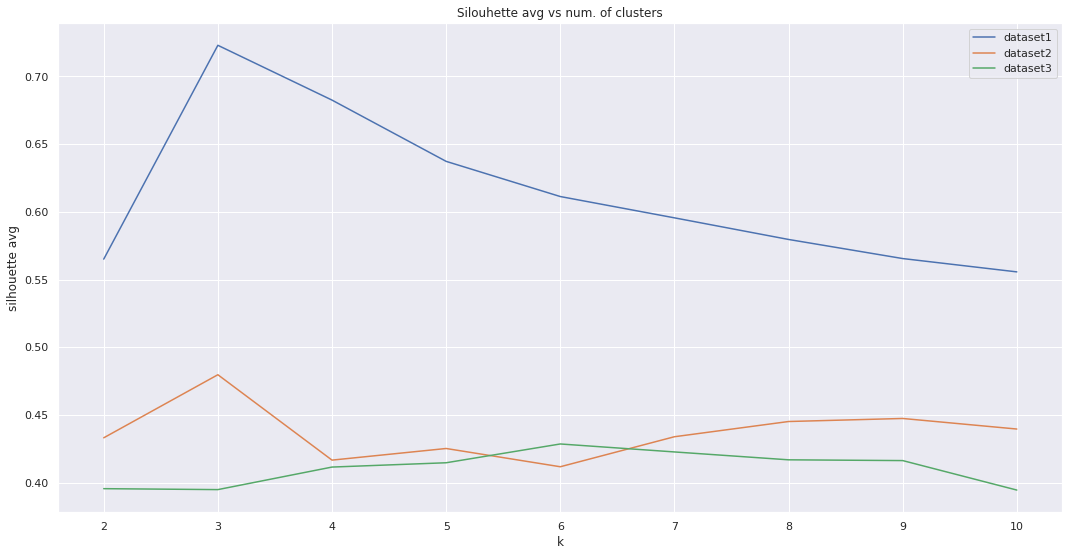

In [12]:
plt.figure(figsize=(18, 9))
for i, label in enumerate(['dataset1', 'dataset2', 'dataset3']):
    plt.plot([k for k in range(2, 11)], avg[i], label=label)
plt.legend()
plt.title('Silouhette avg vs num. of clusters')
plt.xlabel('k')
plt.ylabel('silhouette avg')
plt.show()

Dataset 0


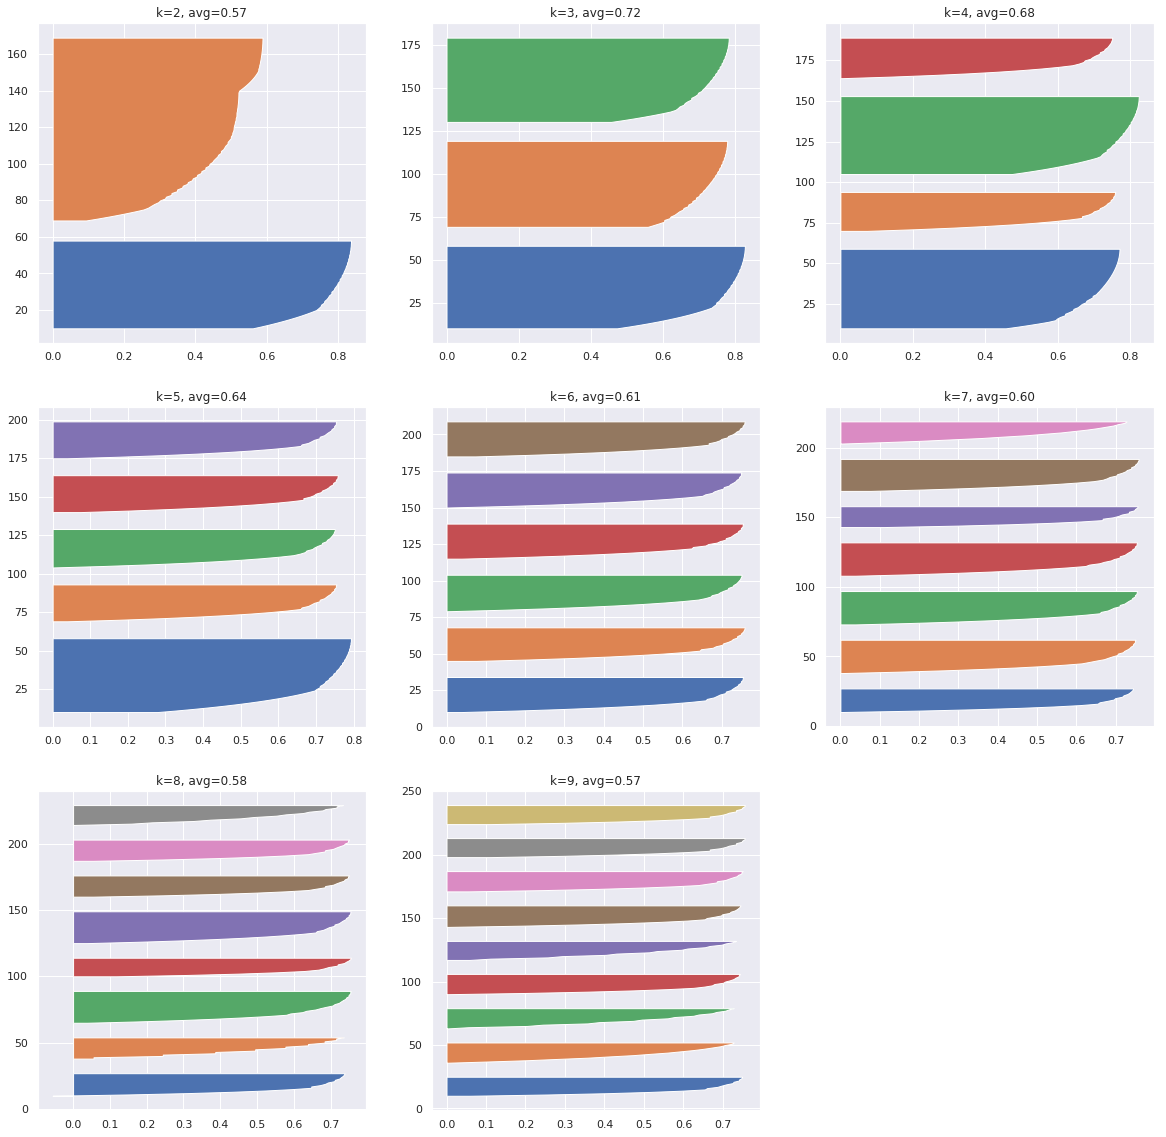

Dataset 1


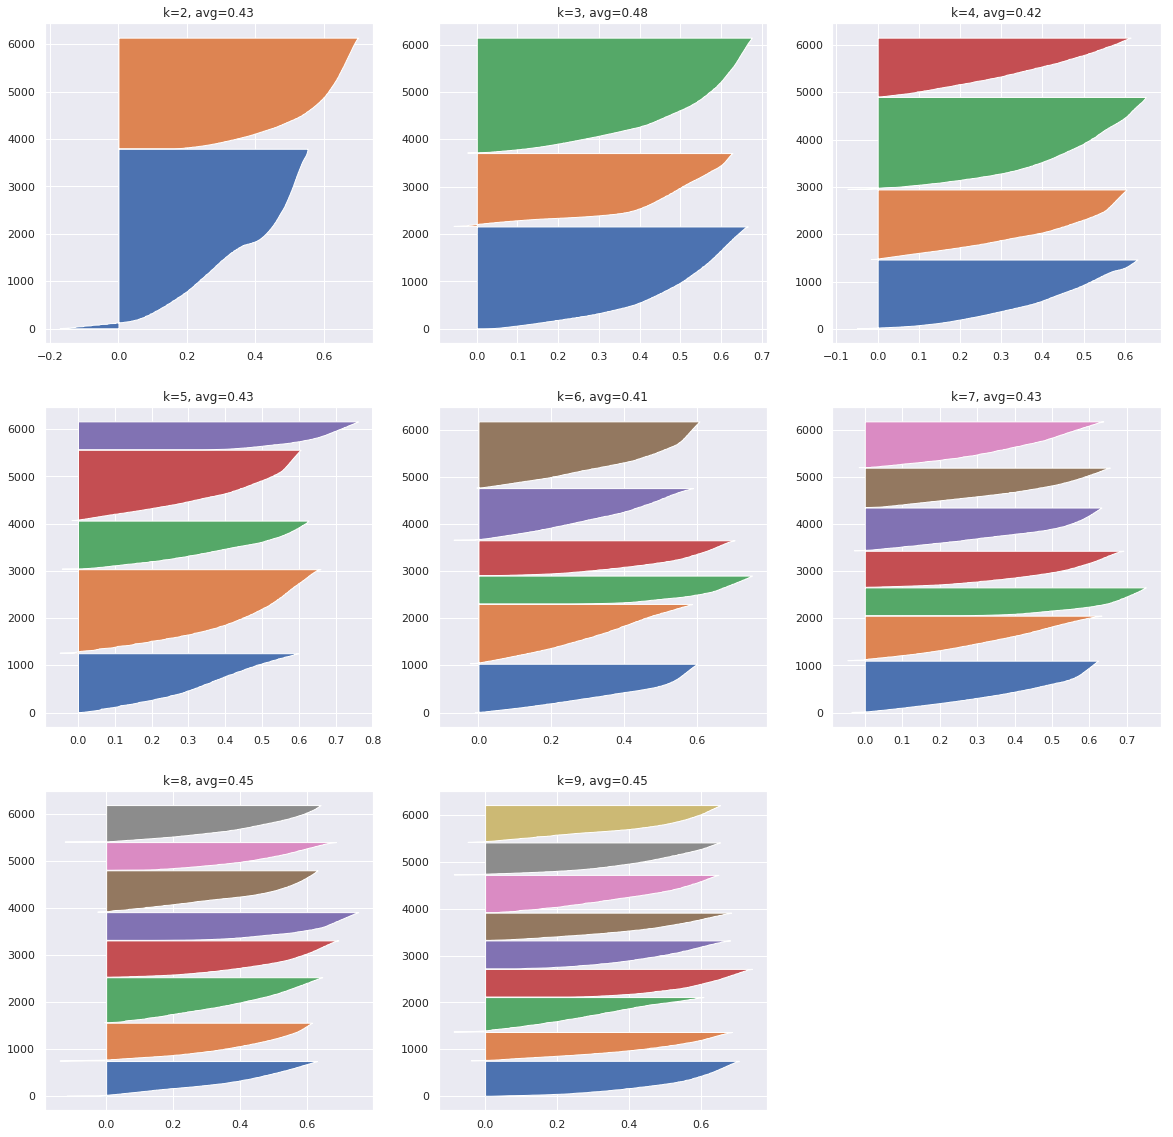

Dataset 2


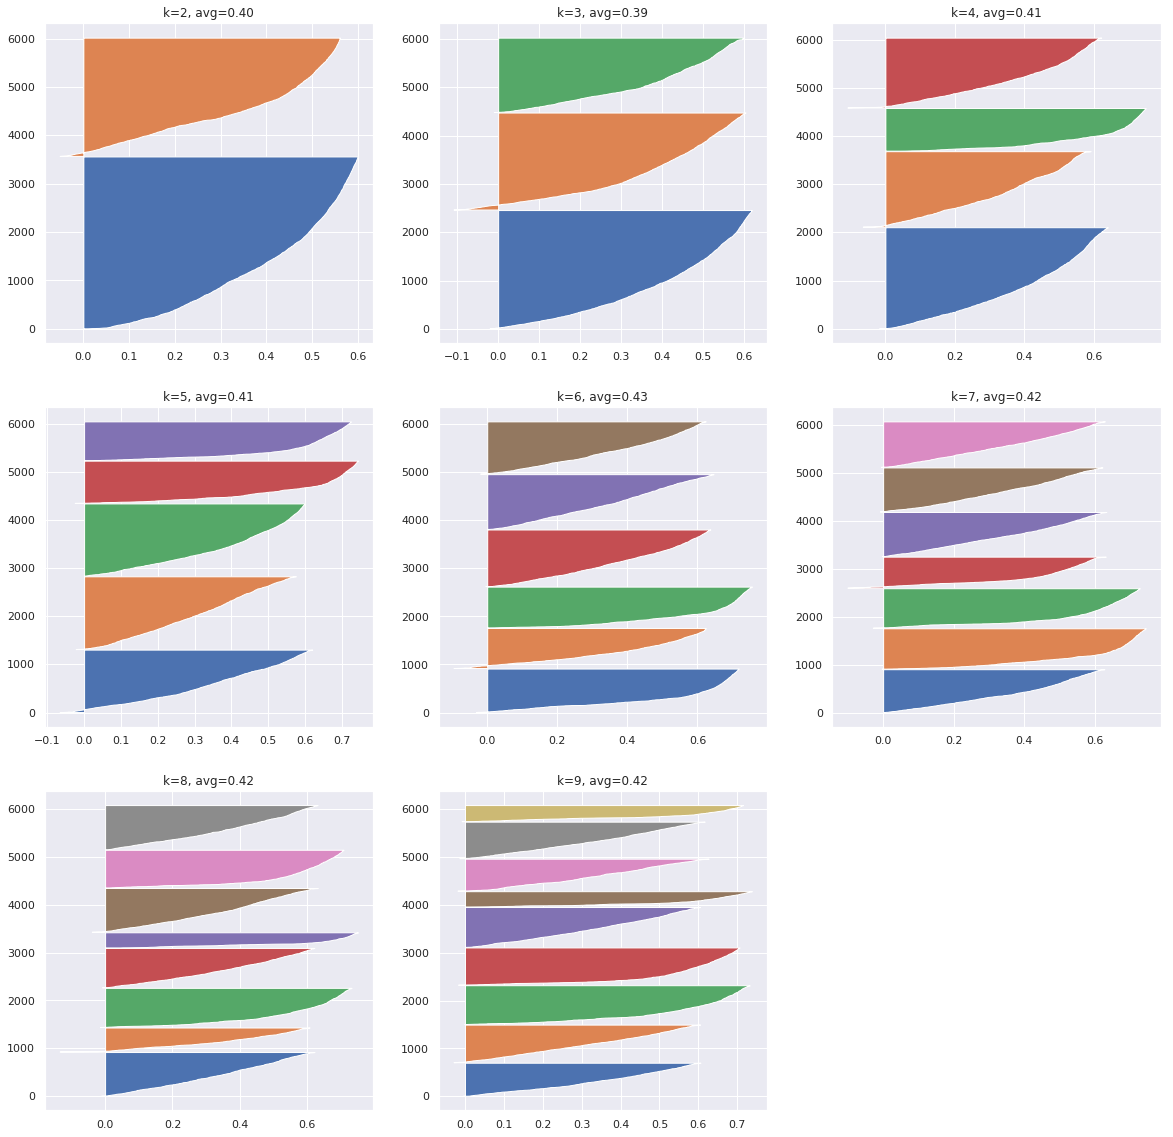

In [13]:
#9 plot per dataset
for i in range(3):
    print(f"Dataset {i}")
    plt.figure(figsize=(20, 20))
    for j in range(2, 10):
        silhouette_samples = samples[i][j-2]
        l = labels[i][j-2]
        
        plt.subplot(3, 3, j-1)
        plt.title('k={}, avg={:.2f}'.format(j, avg[i][j-2]))
        
        y_lower = 10
        for cluster in range(j+1):
            cluster_samples = silhouette_samples[l == cluster]
            cluster_samples.sort()
            cluster_size = cluster_samples.shape[0]
            
            y_upper = y_lower + cluster_size

            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                cluster_samples
            )
            y_lower = y_upper + 10
            
    plt.show()